In [2]:
import ROOT,os,glob,math

Welcome to JupyROOT 6.18/00


e1_phi_1


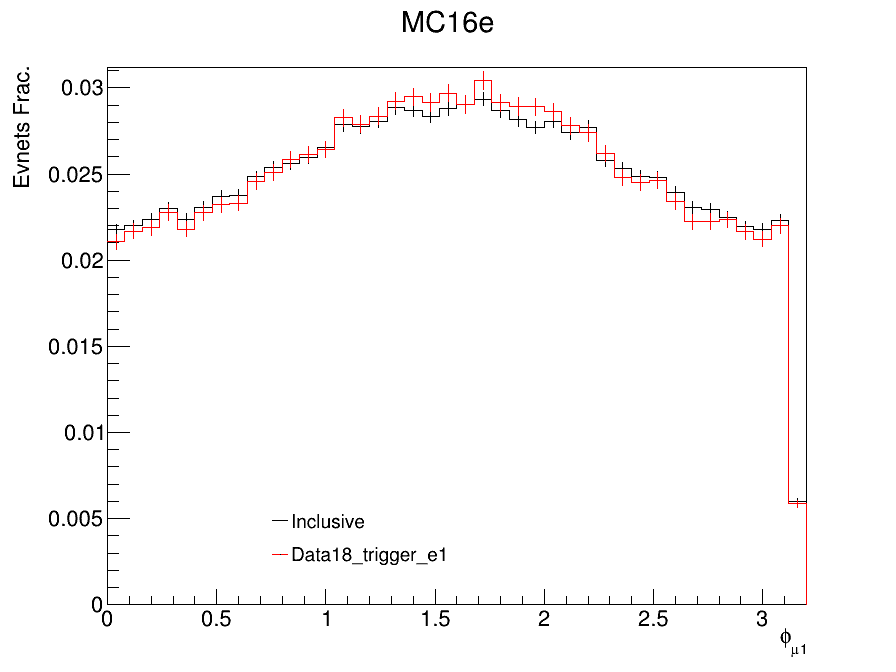

In [3]:
pi=ROOT.TMath.Pi()
key="_e1"
path="./Reduce/hists_mc16e.root"
f=ROOT.TFile(path,"r")
count=1

anglelist=['theta_x', 'phi_1', 'phi_2', 'theta_phi_1', 'theta_phi_2']
hist1=anglelist[count]
hist2=hist1+key
h1=f.Get(hist1)
h2=f.Get(hist2)
cut1="Inclusive"
cut2="Data18_trigger"+key
rebin=4
h1.Rebin(rebin)
h2.Rebin(rebin)
h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())
h1.GetXaxis().SetRangeUser(0,pi)
h1.SetMinimum(0)
h1.SetNameTitle("","MC16e")
if count==0:
    h1.GetXaxis().SetTitle("#theta_{x}")
if count==1:
    h1.GetXaxis().SetTitle("#phi_{#mu1}")
if count==2:
    h1.GetXaxis().SetTitle("#phi_{#mu2}")
if count==3:
    h1.GetXaxis().SetTitle("#theta_{#phi1}")
if count==4:
    h1.GetXaxis().SetTitle("#theta_{#phi2}")
h1.GetYaxis().SetTitle("Evnets Frac.")
h1.SetLineColor(1)
h2.SetLineColor(2)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLeftMargin(0.12)
#c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
h1.Draw("hist e")
h2.Draw("same hist e")
t=ROOT.TLegend(0.3,0.15,0.4,0.25)
t.AddEntry(h1,cut1,"l")
t.AddEntry(h2,cut2,"lp")
t.SetBorderSize(0)
t.SetTextSize(0.03)
t.Draw()
c1.Draw()
name=key.split("_")[1]+"_"+hist1
print(name)
#c1.SaveAs("figures0903/"+name+".jpg")
#c1.SaveAs("figures0903/"+name+".pdf")